<a href="https://colab.research.google.com/github/Miranda-Merino-Irigoyen-Jorge-Missael/Simulaci-n-2/blob/main/Metropoli_Hastings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

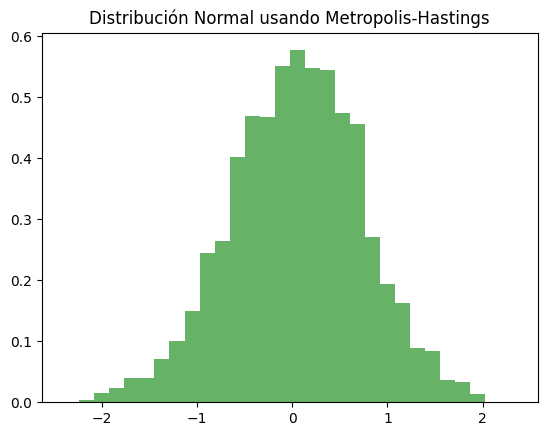

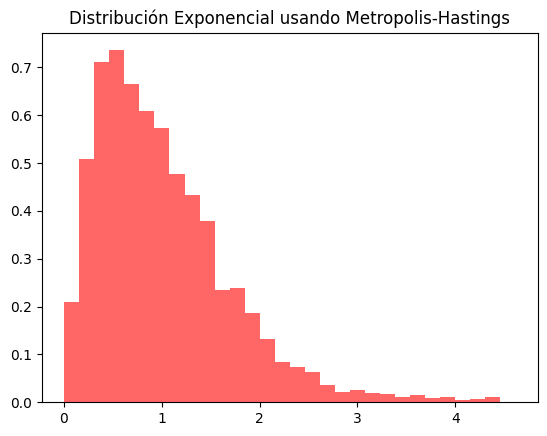

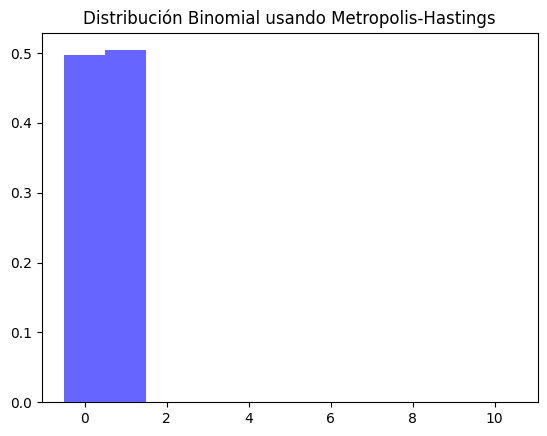

In [3]:
#Autor: Miranda Merino Irigoyen Jorge Missael
#Fecha: 06/10/202
#Objetivo: Este programa tiene como objetivo generar muestras de 3 distribuciones estadísticas utilizando el algoritmo de Metropolis-Hastings
#Versión: 1.1

################ CODIGO #######################
# Primero importamos las librerías que utilizaremos
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

############# Funciones #######################
# Definimos la función objetivo #
def target(dist, prior, param, theta):
    if dist == 'normal':
        # Prior normal con media 0 y desviación estándar 1
        return st.norm(0, 1).pdf(theta) * st.norm(param[0], param[1]).pdf(theta)
    elif dist == 'exponencial':
        # Prior gamma para la exponencial
        return st.gamma(a=2, scale=1).pdf(theta) * st.expon(scale=param[0]).pdf(theta)
    elif dist == 'binomial':
        # Prior beta para la binomial
        if theta < 0 or theta > 1:
            return 0
        return st.beta(1, 1).pdf(theta) * st.binom(param[0], theta).pmf(param[1])

# Función que implementa el algoritmo de Metropolis-Hastings #
def metropolissampler(niters, dist, prior, theta, param, sigma):
    samples = np.zeros(niters + 1)
    samples[0] = theta
    for i in range(niters):
        theta_p = theta + st.norm(0, sigma).rvs()  # Propuesta de salto normal
        rho = min(1, target(dist, prior, param, theta_p) / target(dist, prior, param, theta))
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
        samples[i + 1] = theta
    return samples

################### Experimento #############################

# Parámetros de las distribuciones
niters = 5000  # Número de iteraciones
sigma = 0.5  # Desviación estándar del salto propuesto

# 1. Distribución Normal
param_normal = [0, 1]  # Media y desviación estándar
theta_normal = 0.5  # Valor inicial
samples_normal = metropolissampler(niters, 'normal', None, theta_normal, param_normal, sigma)
plt.hist(samples_normal, bins=30, density=True, alpha=0.6, color='g')
plt.title('Distribución Normal usando Metropolis-Hastings')
plt.show()

# 2. Distribución Exponencial
param_exp = [1]  # Parámetro lambda
theta_exp = 1  # Valor inicial
samples_exp = metropolissampler(niters, 'exponencial', None, theta_exp, param_exp, sigma)
plt.hist(samples_exp, bins=30, density=True, alpha=0.6, color='r')
plt.title('Distribución Exponencial usando Metropolis-Hastings')
plt.show()

# 3. Distribución Binomial
param_binom = [10, 5]  # Número de ensayos y éxitos
theta_binom = 0.5  # Valor inicial para theta (probabilidad de éxito)
samples_binom = metropolissampler(niters, 'binomial', None, theta_binom, param_binom, sigma)
plt.hist(samples_binom, bins=np.arange(0, param_binom[0] + 2) - 0.5, density=True, alpha=0.6, color='b')
plt.title('Distribución Binomial usando Metropolis-Hastings')
plt.show()
